In [1]:
pip install --upgrade tensorflow keras


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np

# Specify the path to the dataset you uploaded
path = '/kaggle/input/mnisth/mnist.npz'  # Replace <your-dataset-name> with the actual name of your dataset folder

# Load the data
with np.load(path, allow_pickle=True) as data:
    X_train, Y_train = data['x_train'], data['y_train']
    X_test, Y_test = data['x_test'], data['y_test']

# Print the shapes to verify
print("Training data shape:", X_train.shape, Y_train.shape)
print("Test data shape:", X_test.shape, Y_test.shape)


Training data shape: (60000, 28, 28) (60000,)
Test data shape: (10000, 28, 28) (10000,)


In [3]:
len(X_train) # to know Xtrain that we have 

60000

60 000 DIGITS IMAGES 

In [4]:
len(X_test)

10000

10000 img for testing

This is pretty good  like a big dataset let's start then ! 


In [5]:
X_train[0].shape

(28, 28)

Here to see what we have in eatch sample , like here we have  sample is a 28 by 28 pixel image 

In [6]:
#the weights represented by a 2d array represented like :
X_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

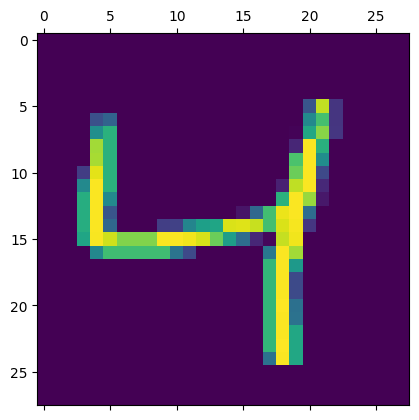

In [8]:
import matplotlib.pyplot as plt

# Display the third image in the training set
plt.matshow(X_train[2])
plt.show()

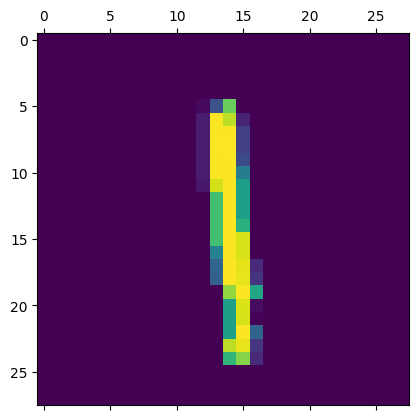

In [9]:
plt.matshow(X_train[8])

Here is the handwritten digits that we have in the mnist data set 

In [10]:
Y_train[2]

4

In [11]:
Y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

Y train in general contain numbers between 0 & 9 

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
# "flattening" refers to the process of converting a multi-dimensional array (like an image) into a one-dimensional array (vector)
# flattening = 2D -> 1D
# WE WILL DO IT WITH PANDAS WITH A FUNCTION CALLED RESHAPE 
X_train_flattened= X_train.reshape(len(X_train),28*28)
X_train_flattened.shape


(60000, 784)

In [14]:
#same for X_test 
X_test_flattened= X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [15]:
X_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

Now it becomes a single dimensional array 

In [17]:
import tensorflow as tf
from tensorflow import keras  # Import keras from TensorFlow

# Assuming X_train_flattened is your flattened training data
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid') 
])

model.compile(
    # Parameters 
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',  # 'sparse' for integer labels
    metrics=['accuracy']  # Corrected 'matrics' to 'metrics'
)

# Train the model
model.fit(X_train_flattened, Y_train, epochs=5)  # Ensure X_train_flattened is defined


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7778 - loss: 16.7355
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8762 - loss: 6.0404
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8816 - loss: 5.6940
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8850 - loss: 5.4682
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8858 - loss: 5.2616


# Accuracy = 88.58 with no scaling 

here in our case accuracy come out to be low in a way so for that we will do a method to evaluate the accuracy

# here we gonna do scaling , coz our values are  not scaled often in machine learning we need to scale the values  
For image data like MNIST, scaling the pixel values (originally between 0 and 255) to a range between 0 and 1 (by dividing by 255) helps the model train more effectively by keeping the input values within a range that neural network activations handle well.

In [22]:
X_train_scaled= X_train/255
X_test_scaled= X_test/255

In [24]:
X_train_scaled[0]
X_test_scaled[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

The values now are between  0 and 1 

In [29]:
#After scaling we will do # "flattening" refers to the process of converting a multi-dimensional array (like an image) into a one-dimensional array (vector)
# flattening = 2D -> 1D
# WE WILL DO IT WITH PANDAS WITH A FUNCTION CALLED RESHAPE 
X_train_flattened1= X_train_scaled.reshape(len(X_train_scaled),28*28)
X_train_flattened1.shape


(60000, 784)

In [30]:
X_test_flattened2= X_test_scaled.reshape(len(X_test_scaled),28*28)
X_test_flattened2.shape
X_test_flattened2[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [31]:
import tensorflow as tf
from tensorflow import keras  # Import keras from TensorFlow

# Assuming X_train_flattened is your flattened training data
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')  
])

model.compile(
    # Parameters 
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',  # 'sparse' for integer labels
    metrics=['accuracy']  # Corrected 'matrics' to 'metrics'
)

# Train the model
model.fit(X_train_flattened1, Y_train, epochs=5)  # Ensure X_train_flattened1 is defined


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8149 - loss: 0.7214
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9120 - loss: 0.3144
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9197 - loss: 0.2870
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9257 - loss: 0.2701
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9248 - loss: 0.2710


 # As we see here the accruracy is higher than before 

# Let's try to evaluate the accuracy on a testdataset 

In [33]:
model.evaluate(X_test_flattened2,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9153 - loss: 0.3037


[0.26776430010795593, 0.9258999824523926]

# Accuracy = 92.58 with no hidden layer

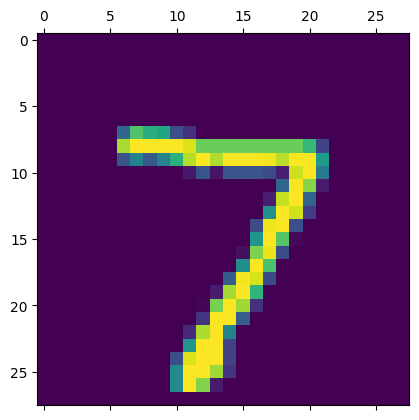

In [37]:
plt.matshow(X_test[0])

In [40]:
Y_predicted=model.predict(X_test_flattened2)
Y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([1.6478783e-02, 5.0936291e-07, 3.1951617e-02, 9.6077478e-01,
       2.0709285e-03, 1.4816321e-01, 4.1464600e-06, 9.9969977e-01,
       1.0921961e-01, 6.4971238e-01], dtype=float32)

We will use a function called np.argmax from numpy , this function will find the maximum value and it will print the index of the value 

In [41]:
np.argmax(Y_predicted[0])

7

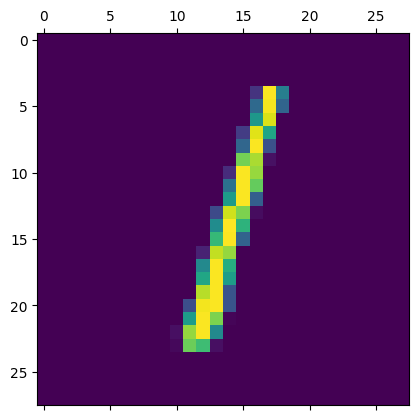

In [43]:
plt.matshow(X_test[2])

In [44]:
np.argmax(Y_predicted[2])

1

In [49]:
Y_test[:5]
#INTEGERS

array([7, 2, 1, 0, 4], dtype=uint8)

In [51]:
#First we need to convert Y_test to class label 
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
Y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Here I am getting first five prediction and as we see that THE5 FIRST predictions are actually matching with the first five truth data 

# Confusion matrics to see how all prediction look like

In [55]:
#Build a confusion matrics 
cm = tf.math.confusion_matrix(labels=Y_test,predictions= Y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    0,    2,    0,    5,   11,    2,    2,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   6,    9,  924,   16,    8,    4,   13,   10,   39,    3],
       [   4,    0,   16,  933,    1,   17,    4,    7,   21,    7],
       [   1,    1,    2,    2,  918,    0,   13,    4,    8,   33],
       [   9,    2,    2,   39,    9,  763,   22,    5,   33,    8],
       [   7,    3,    6,    1,    7,    7,  924,    2,    1,    0],
       [   1,    5,   20,   11,    8,    1,    0,  940,    3,   39],
       [   5,   11,    7,   23,    9,   27,   12,    9,  864,    7],
       [  10,    7,    1,   12,   30,    6,    0,   18,    8,  917]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

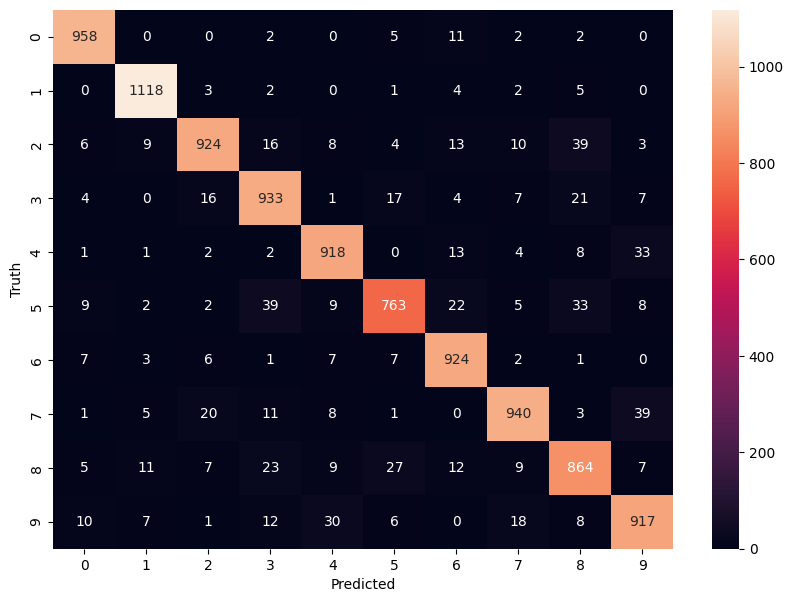

In [57]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


Here we can see all the errors using confusion matrix

# Apply same model a,d adding a hidden layer = Improve performance

In [59]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')  #no need the input shape we already haveit in the first layer so it will be connected to the first one 
])#here we have one hidden layer but we can add more hidden layers 

model.compile(
    # Parameters 
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',  # 'sparse' for integer labels
    metrics=['accuracy']  # Corrected 'matrics' to 'metrics'
)

# Train the model
model.fit(X_train_flattened1, Y_train, epochs=5)  # Ensure X_train_flattened1 is defined


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8711 - loss: 0.4626
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9613 - loss: 0.1335
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9728 - loss: 0.0908
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9806 - loss: 0.0651
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9852 - loss: 0.0511


# Higher accuracy 

In [60]:
model.evaluate(X_test_flattened2,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9739 - loss: 0.0855


[0.07393918931484222, 0.9764000177383423]

# Accuracy =97.64% with hidden layer

Text(95.72222222222221, 0.5, 'Truth')

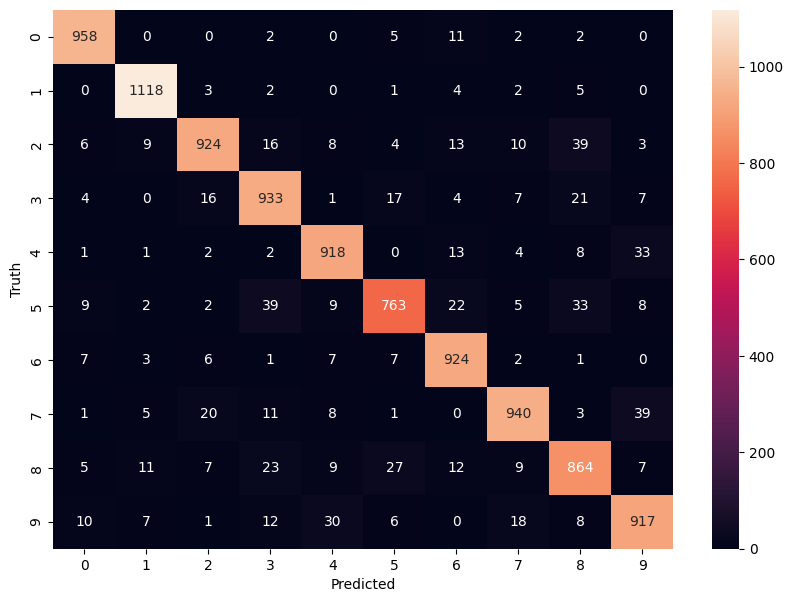

In [61]:
#Build a confusion matrics 
cm = tf.math.confusion_matrix(labels=Y_test,predictions= Y_predicted_labels)
cm


plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


# In this notebook we userd flatten arrays but in keras we can apply a special layer called flatten  and we will apply it now 

In [70]:
model = keras. Sequential ( [
keras.layers. Flatten (input_shape=(28,28)),
keras.layers. Dense (100, activation= 'relu'),
keras.layers. Dense (10, activation='sigmoid')
])
model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy' ]
)
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8740 - loss: 0.4552
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9625 - loss: 0.1301
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9752 - loss: 0.0828
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9789 - loss: 0.0678
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9842 - loss: 0.0500
